<a href="https://colab.research.google.com/github/carlosrabazo/deeplearning/blob/main/Ejercicio%20Regularizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [16]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Creo un subconjunto de imágenes de entrenamiento que llamaré
# validation_images con las 10000 últimas imágenes del set de
# datos de entrenamiento (obviamente, lo mismo con las etiquetas
# correspondientes)
validation_images = train_images[50000:60000]
validation_labels = train_labels[50000:60000]
train_images = train_images[:50000]
train_labels = train_labels[:50000]

In [18]:
from keras import regularizers

def crea_modelo(regularizador):
  modelo = models.Sequential()
  if (regularizador==0):
    modelo.add(layers.Dense(512, name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
  elif regularizador==1:
    modelo.add(layers.Dense(512,kernel_regularizer=regularizers.l1(0.001) ,
                         name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
  modelo.add(layers.Dense(10, name='Capa_Salida_Softmax', activation='softmax'))
  modelo.summary()
  return modelo

def compila_modelo(modelo): 
  modelo.compile(optimizer='rmsprop', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  return modelo

def entrena_modelo(modelo):
  historia = modelo.fit(train_images, train_labels, epochs=3, batch_size=128, 
            validation_data=(validation_images, validation_labels))
  return historia

In [19]:
network0 = crea_modelo(0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada_Relu (Dense)   (None, 512)               401920    
                                                                 
 Capa_Salida_Softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
network0 = compila_modelo(network0)

In [21]:
historia0 = entrena_modelo(network0)

Epoch 1/3
391/391 [==============================] - 3s 7ms/step - loss: 0.2831 - accuracy: 0.9180 - val_loss: 0.1685 - val_accuracy: 0.9491
Epoch 2/3
391/391 [==============================] - 3s 7ms/step - loss: 0.1180 - accuracy: 0.9654 - val_loss: 0.0985 - val_accuracy: 0.9710
Epoch 3/3
391/391 [==============================] - 3s 7ms/step - loss: 0.0778 - accuracy: 0.9773 - val_loss: 0.0800 - val_accuracy: 0.9768


In [22]:
import matplotlib.pyplot as plt

def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

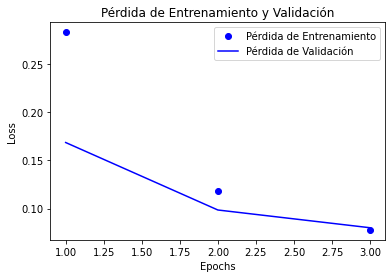

In [23]:
pinta_perdida_entrenamiento_validacion(historia0)

In [24]:
import matplotlib.pyplot as plt

def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

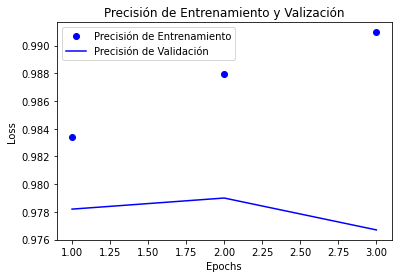

In [25]:
pinta_precision_entrenamiento_validacion(historia0)

In [26]:
network1 = crea_modelo(1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada_Relu (Dense)   (None, 512)               401920    
                                                                 
 Capa_Salida_Softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [27]:
network1 = compila_modelo(network1)

In [29]:
historia1 = entrena_modelo(network1)

Epoch 1/3
391/391 [==============================] - 3s 8ms/step - loss: 2.1273 - accuracy: 0.8448 - val_loss: 0.9883 - val_accuracy: 0.8871
Epoch 2/3
391/391 [==============================] - 3s 8ms/step - loss: 0.9656 - accuracy: 0.8788 - val_loss: 0.9025 - val_accuracy: 0.8930
Epoch 3/3
391/391 [==============================] - 4s 9ms/step - loss: 0.8388 - accuracy: 0.9017 - val_loss: 0.7711 - val_accuracy: 0.9183


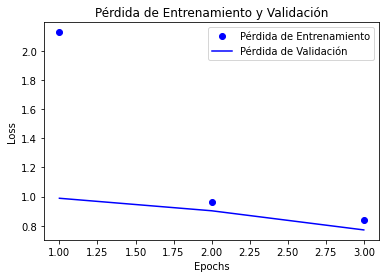

In [30]:
pinta_perdida_entrenamiento_validacion(historia1)

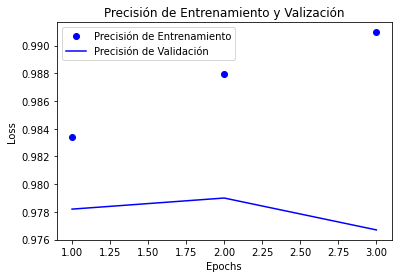

In [31]:
pinta_precision_entrenamiento_validacion(historia1)

In [28]:
history_dict = history.history

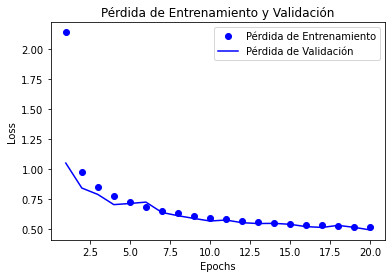

In [29]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

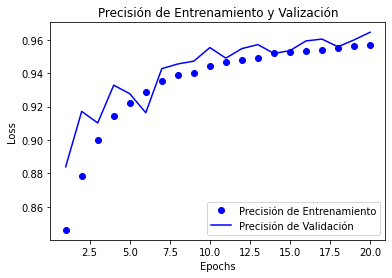

In [30]:
plt.clf()   # Limpia la figura
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [31]:
from keras import regularizers

network = models.Sequential()
network.add(layers.Dense(512,kernel_regularizer=regularizers.l2(0.001) ,
                         name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, name='Capa_Salida_Softmax', activation='softmax'))
network.summary()
print("=======================================================================")
network.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=20, batch_size=128, 
            validation_data=(validation_images, validation_labels))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada_Relu (Dense)   (None, 512)               401920    
                                                                 
 Capa_Salida_Softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 5s 12ms/step - loss: 0.5299 - accuracy: 0.9117 - val_loss: 0.3026 - val_accuracy: 0.9524
Epoch 2/20
391/391 [==============================] - 5s 12ms/step - loss: 0.2651 - accuracy: 0.9528 - val_loss: 0.2369 - val_accuracy: 0.9580
Epoch 3/20
391/391 [==============================] - 4s 11ms/step - loss: 0.2080 - accuracy: 0.9632 - val_loss: 0.2068 - val_accuracy: 0.9651
Epoch 4/20
391/

In [32]:
history_dict = history.history

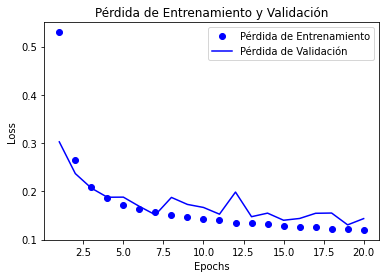

In [33]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

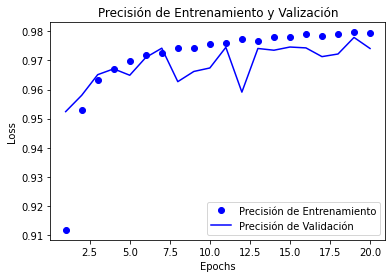

In [34]:
plt.clf()   # Limpia la figura
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [35]:
from keras import regularizers

network = models.Sequential()
network.add(layers.Dense(512,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001) ,
                         name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, name='Capa_Salida_Softmax', activation='softmax'))
network.summary()
print("=======================================================================")
network.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=20, batch_size=128, 
            validation_data=(validation_images, validation_labels))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada_Relu (Dense)   (None, 512)               401920    
                                                                 
 Capa_Salida_Softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 7s 17ms/step - loss: 2.1670 - accuracy: 0.8415 - val_loss: 1.0403 - val_accuracy: 0.8767
Epoch 2/20
391/391 [==============================] - 5s 14ms/step - loss: 0.9732 - accuracy: 0.8772 - val_loss: 0.8759 - val_accuracy: 0.9097
Epoch 3/20
391/391 [==============================] - 5s 14ms/step - loss: 0.8543 - accuracy: 0.8992 - val_loss: 0.7766 - val_accuracy: 0.9227
Epoch 4/20
391/

In [36]:
history_dict = history.history

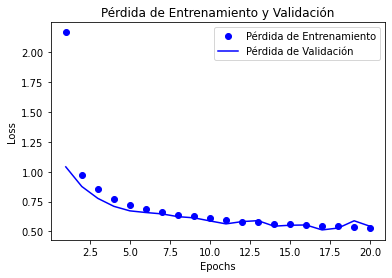

In [37]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

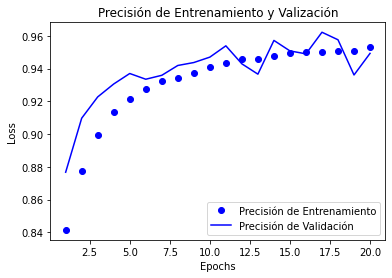

In [38]:
plt.clf()   # Limpia la figura
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [39]:
from keras import regularizers

network = models.Sequential()
network.add(layers.Dense(512, name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, name='Capa_Salida_Softmax', activation='softmax'))
network.summary()
print("=======================================================================")
network.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=20, batch_size=128, 
            validation_data=(validation_images, validation_labels))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada_Relu (Dense)   (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 Capa_Salida_Softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 5s 12ms/step - loss: 0.3428 - accuracy: 0.8990 - val_loss: 0.1630 - val_accuracy: 0.9527
Epoch 2/20
391/391 [==============================] - 4s 11ms/step - loss: 0.1713 - accuracy: 0.9491 - val_loss: 0.1140 - val_accuracy: 0.9663
Epoch 3/20
391/391 [======

In [40]:
history_dict = history.history

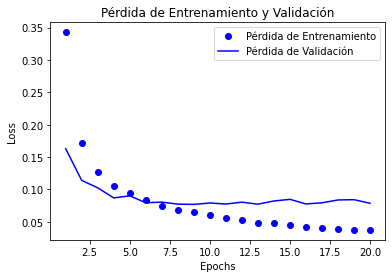

In [41]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

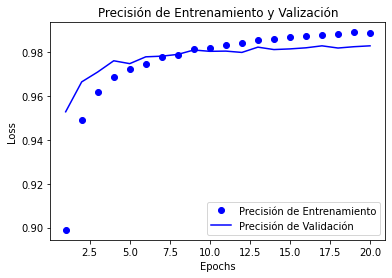

In [42]:
plt.clf()   # Limpia la figura
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()